# Q1

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

In [352]:
features_data = pd.read_csv('feature_presence540.txt', delim_whitespace=True, header=None)
features_data = features_data.iloc[:480, [2] + list(range(3, 14))]
features_data.columns = ['token'] + [f'feature_{i}' for i in range(1, 12)]

labels_data = pd.read_excel('aggregateRockData.xlsx', header=None)
labels_data = labels_data.iloc[:480, 1]


In [353]:
data = pd.concat([features_data, labels_data.rename('label')], axis=1)
print(data.describe())

        feature_4   feature_5   feature_6   feature_7   feature_8   feature_9  \
count  480.000000  480.000000  480.000000  480.000000  480.000000  480.000000   
mean     0.042292    0.165146    0.052396    0.144479    0.141458    0.031667   
std      0.160970    0.216635    0.102676    0.265689    0.168222    0.135647   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.100000    0.000000    0.000000    0.100000    0.000000   
75%      0.000000    0.212500    0.050000    0.100000    0.200000    0.000000   
max      1.000000    0.950000    0.900000    1.000000    0.950000    1.000000   

       feature_10  feature_11       label  
count  480.000000  480.000000  480.000000  
mean     0.025104    0.119854    2.000000  
std      0.112153    0.173149    0.817348  
min      0.000000    0.000000    1.000000  
25%      0.000000    0.000000    1.000000  
50%   

In [354]:
# Compute Pearson Correlation Coefficient (PCC)
correlation_matrix = data.corr(method='pearson')

# Display the correlation matrix
print("Pearson Correlation Coefficient Matrix:")
print(correlation_matrix)

Pearson Correlation Coefficient Matrix:
                   token  feature_1  feature_2  feature_3  feature_4  \
token       1.000000e+00   0.003556  -0.002632  -0.049946  -0.035272   
feature_1   3.556392e-03   1.000000   0.250326  -0.133497  -0.103118   
feature_2  -2.632315e-03   0.250326   1.000000  -0.123095  -0.083384   
feature_3  -4.994586e-02  -0.133497  -0.123095   1.000000   0.196752   
feature_4  -3.527214e-02  -0.103118  -0.083384   0.196752   1.000000   
feature_5   5.704335e-02  -0.225362  -0.235652  -0.026329  -0.134700   
feature_6   2.853021e-02  -0.123902  -0.141425   0.042965   0.045330   
feature_7   2.000768e-03  -0.150316  -0.140435  -0.105445  -0.070313   
feature_8  -3.670989e-02   0.063420   0.005265  -0.135787  -0.116348   
feature_9   5.703188e-02  -0.087195  -0.092404  -0.025440  -0.056443   
feature_10 -1.512700e-03  -0.018756  -0.041817  -0.069152  -0.056908   
feature_11  4.529352e-02  -0.165639  -0.136152   0.112303  -0.071011   
label      -8.829406e-16

        feature_4   feature_5   feature_6   feature_7   feature_8   feature_9  \
count  480.000000  480.000000  480.000000  480.000000  480.000000  480.000000   
mean     0.042292    0.165146    0.052396    0.144479    0.141458    0.031667   
std      0.160970    0.216635    0.102676    0.265689    0.168222    0.135647   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.100000    0.000000    0.000000    0.100000    0.000000   
75%      0.000000    0.212500    0.050000    0.100000    0.200000    0.000000   
max      1.000000    0.950000    0.900000    1.000000    0.950000    1.000000   

       feature_10  feature_11       label  
count  480.000000  480.000000  480.000000  
mean     0.025104    0.119854    2.000000  
std      0.112153    0.173149    0.817348  
min      0.000000    0.000000    1.000000  
25%      0.000000    0.000000    1.000000  
50%   

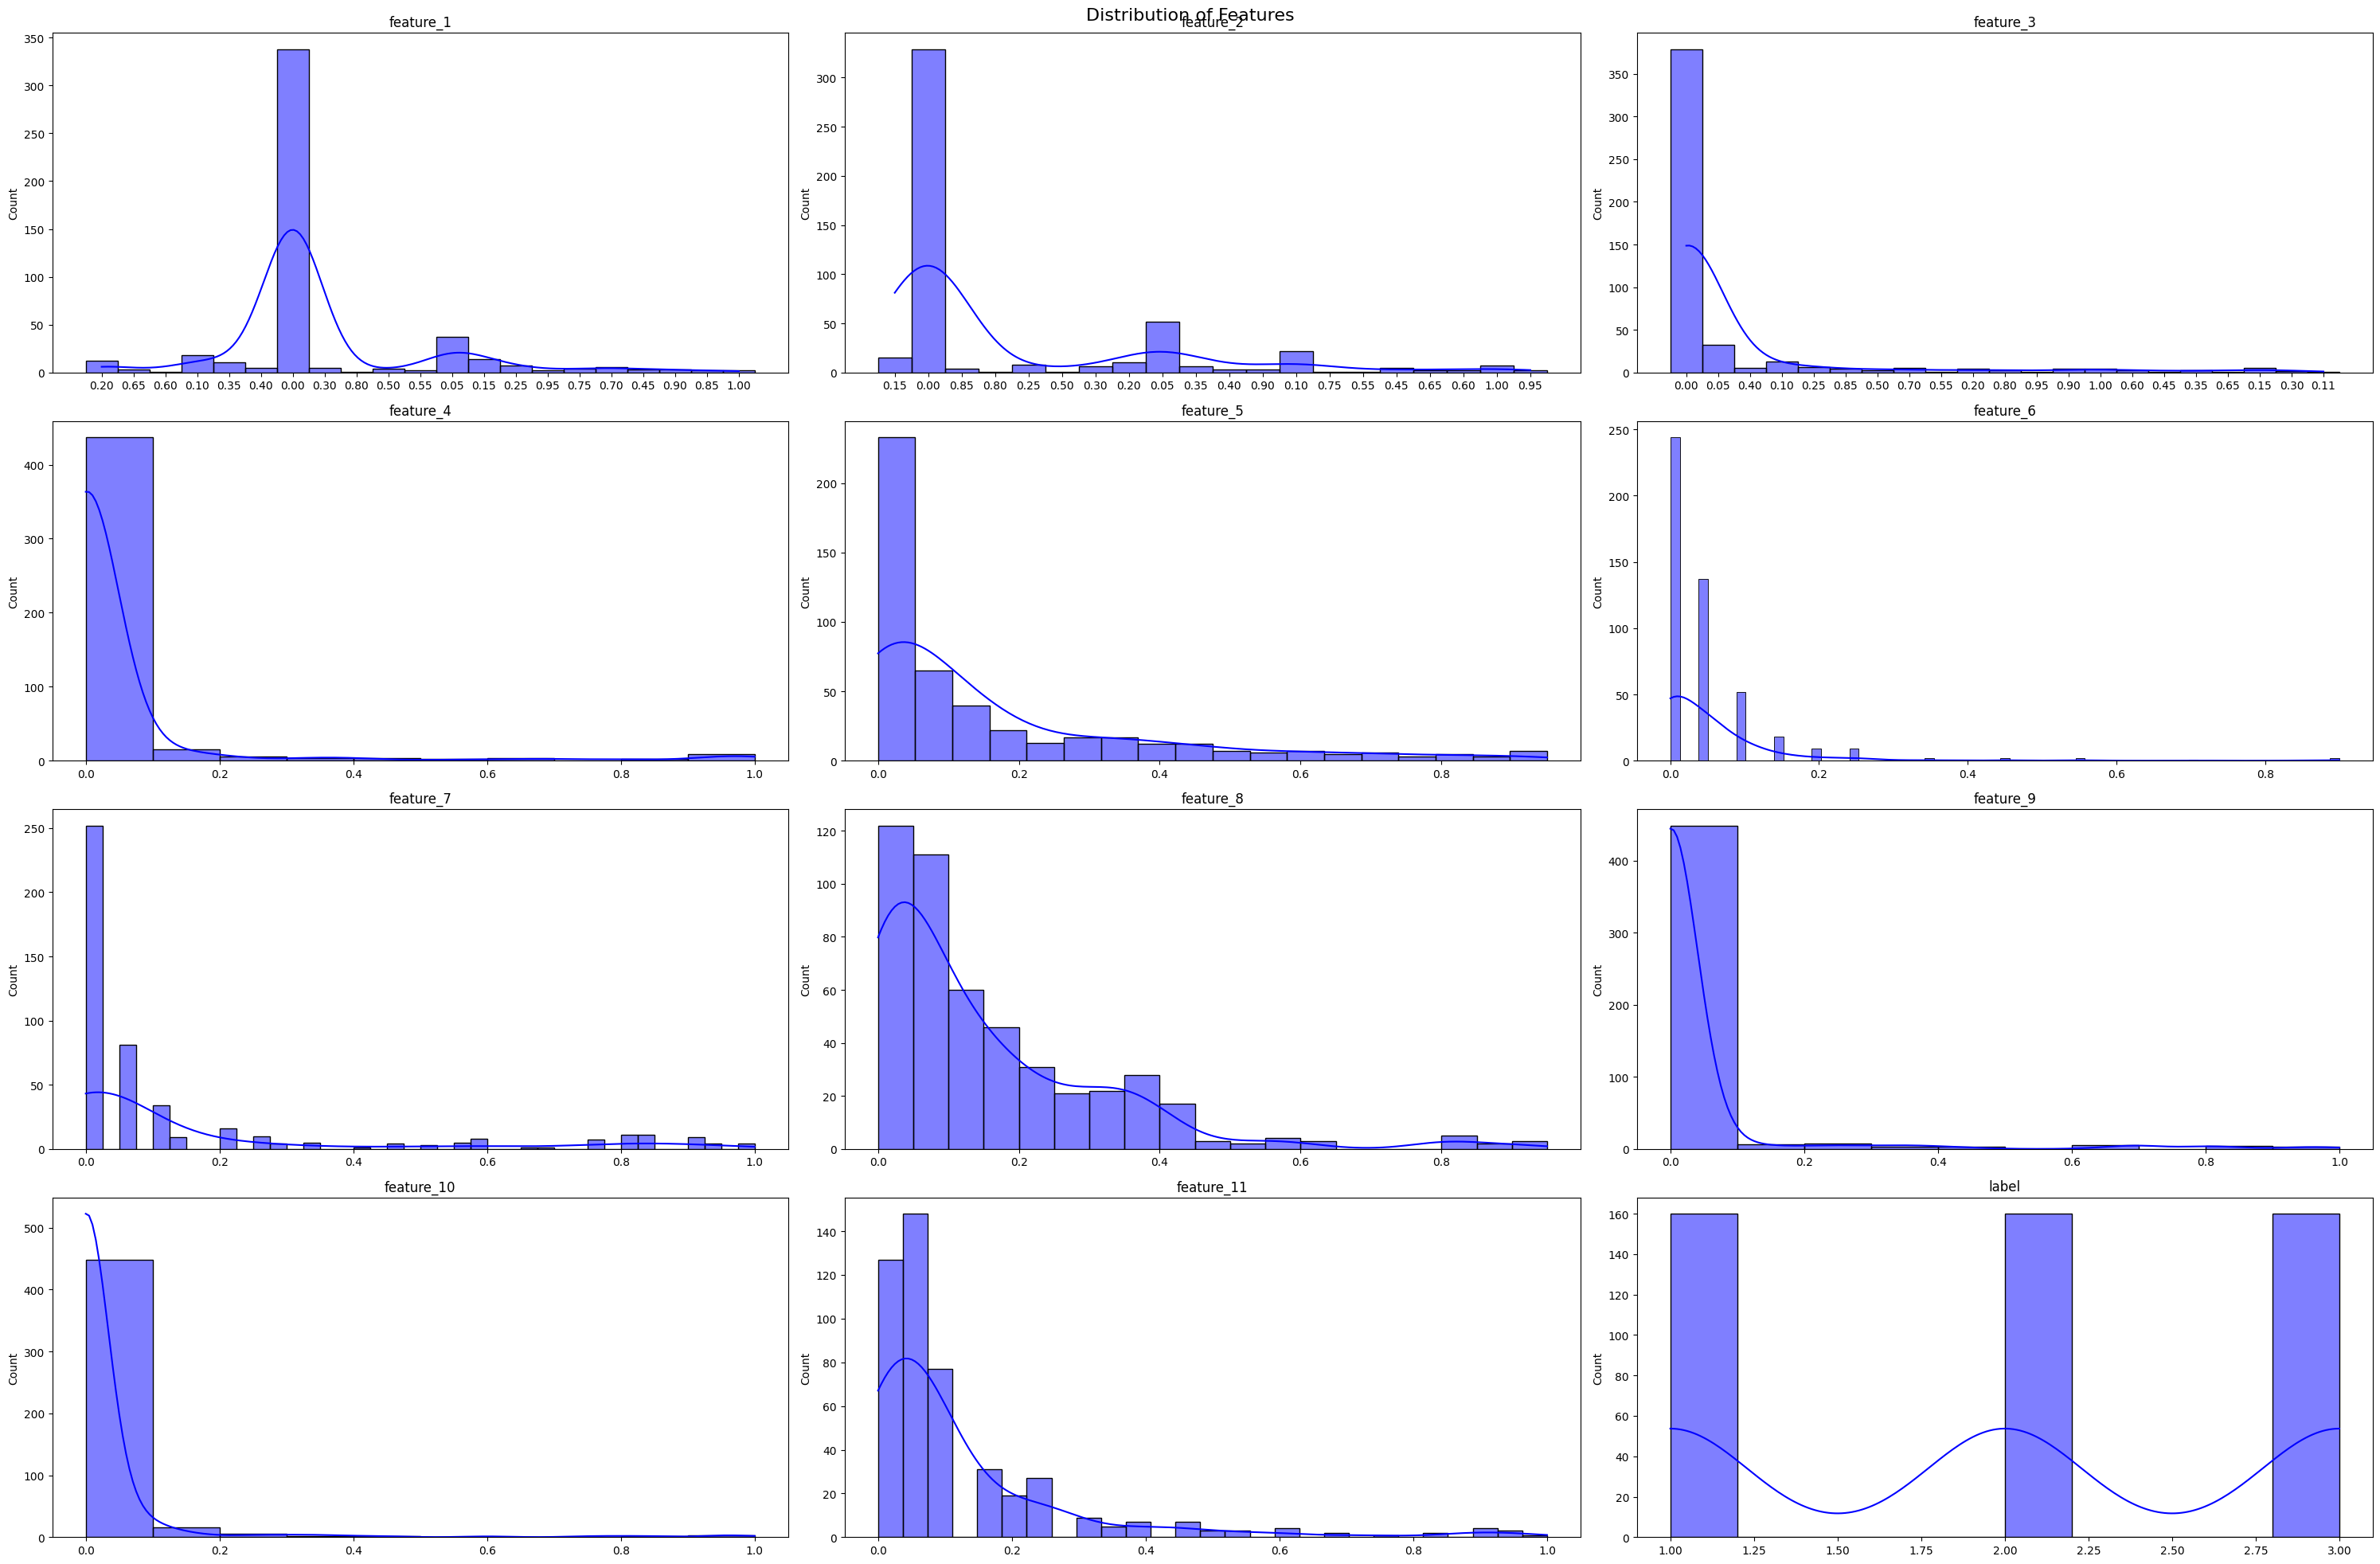

In [355]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display statistical values
print(data.describe())

# Create visualizations for each attribute
fig, axes = plt.subplots(4, 3, figsize=(30, 20))
fig.suptitle('Distribution of Features', fontsize=16)

# Set a blue color palette
sns.set_palette("Blues")

for i, column in enumerate(data.columns[1:]):  # Skip 'token' column
    row = i // 3
    col = i % 3
    sns.histplot(data[column], ax=axes[row, col], kde=True, color='blue')
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('')

plt.tight_layout()
plt.show()


In [356]:
import pandas as pd
import numpy as np
from scipy import stats

# Identify highly skewed columns and apply transformations
for column in data.columns[1:]:  # Skip 'token' column
    if data[column].dtype in ['int64', 'float64']:  # Check if the column contains numeric data
        skewness = data[column].skew()

        # Apply log transformation for positive skewed data
        if abs(skewness) > 1:

            # Apply log transformation for positive data
            if (data[column] > 0).all():
                data[column] = np.log1p(data[column])  # log1p handles zero values safely

            # Apply square root transformation for non-negative data
            elif (data[column] >= 0).all():
                data[column] = np.sqrt(data[column])

            # Apply Box-Cox transformation for mixed positive/negative values
            else:
                data[column], _ = stats.boxcox(data[column] + abs(min(data[column])) + 1)  # Shift to positive before Box-Cox

# Display transformed dataset statistics
print(data.describe())

        feature_4   feature_5   feature_6   feature_7   feature_8   feature_9  \
count  480.000000  480.000000  480.000000  480.000000  480.000000  480.000000   
mean     0.067154    0.304990    0.147471    0.227329    0.298427    0.049476   
std      0.194579    0.268845    0.175249    0.304950    0.229148    0.171113   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.316228    0.000000    0.000000    0.316228    0.000000   
75%      0.000000    0.460410    0.223607    0.316228    0.447214    0.000000   
max      1.000000    0.974679    0.948683    1.000000    0.974679    1.000000   

       feature_10  feature_11       label  
count  480.000000  480.000000  480.000000  
mean     0.048933    0.266646    2.000000  
std      0.150855    0.221034    0.817348  
min      0.000000    0.000000    1.000000  
25%      0.000000    0.000000    1.000000  
50%   

# Q2

Discussion:

The Pearson correlation matrix shows weak to moderate relationships between the features, suggesting they are mostly independent. For example, feature_1 and feature_2 have a moderate correlation (0.25), while feature_3 and feature_4 are weakly correlated (0.20).

In terms of the label, feature_5 has the strongest positive correlation (0.27), followed by feature_9 (0.26) and feature_6 (0.14), indicating these features have some influence on the label. Conversely, feature_8 and feature_11 have weak negative correlations with the label (-0.23 and -0.14, respectively).

The token feature has very low correlations with both the label and other features, suggesting it has minimal relevance in predicting the label. Likewise, feature_1 (-0.12) and feature_2 (0.02) show little influence on the outcome.

Pearson Correlation Coefficient Matrix:
                   token  feature_1  feature_2  feature_3  feature_4  \
token       1.000000e+00   0.003556  -0.002632  -0.049946  -0.042725   
feature_1   3.556392e-03   1.000000   0.250326  -0.133497  -0.135139   
feature_2  -2.632315e-03   0.250326   1.000000  -0.123095  -0.091940   
feature_3  -4.994586e-02  -0.133497  -0.123095   1.000000   0.323704   
feature_4  -4.272518e-02  -0.135139  -0.091940   0.323704   1.000000   
feature_5   4.395256e-02  -0.235113  -0.271380  -0.002376  -0.139188   
feature_6   3.521812e-02  -0.154641  -0.189175   0.045103   0.127943   
feature_7  -4.078453e-03  -0.117487  -0.146930  -0.111917  -0.074379   
feature_8  -5.908635e-02   0.162703   0.071046  -0.132728  -0.097963   
feature_9   1.993028e-02  -0.103247  -0.110362  -0.027590  -0.069286   
feature_10  8.132414e-03   0.053774  -0.010297  -0.092409  -0.102772   
feature_11  3.927971e-02  -0.153485  -0.098780   0.118523  -0.052040   
label      -8.829406e-16

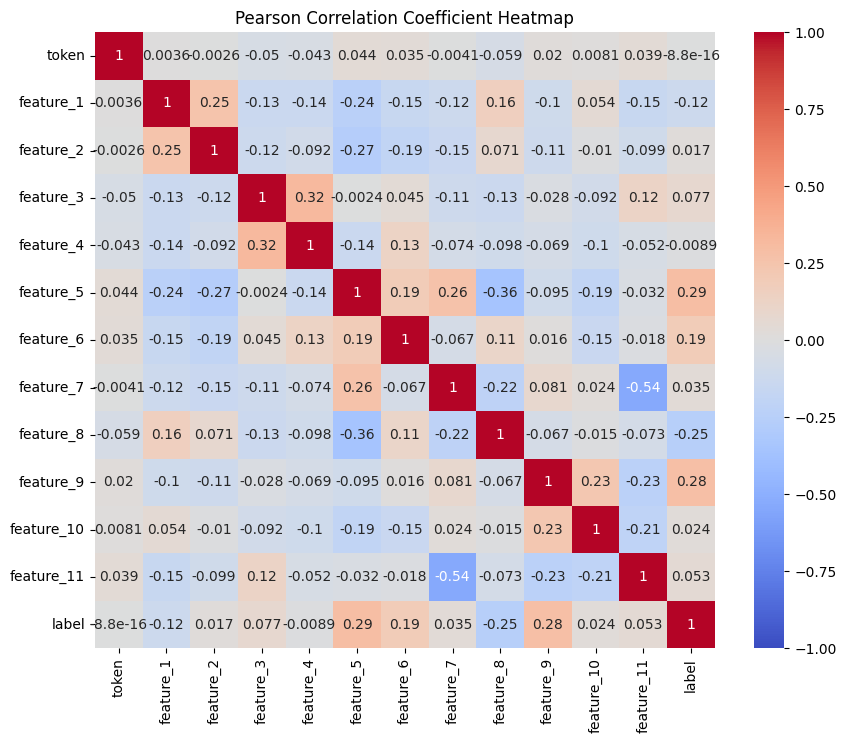

In [357]:
# Compute Pearson Correlation Coefficient (PCC)
correlation_matrix = data.corr(method='pearson')

# Display the correlation matrix
print("Pearson Correlation Coefficient Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

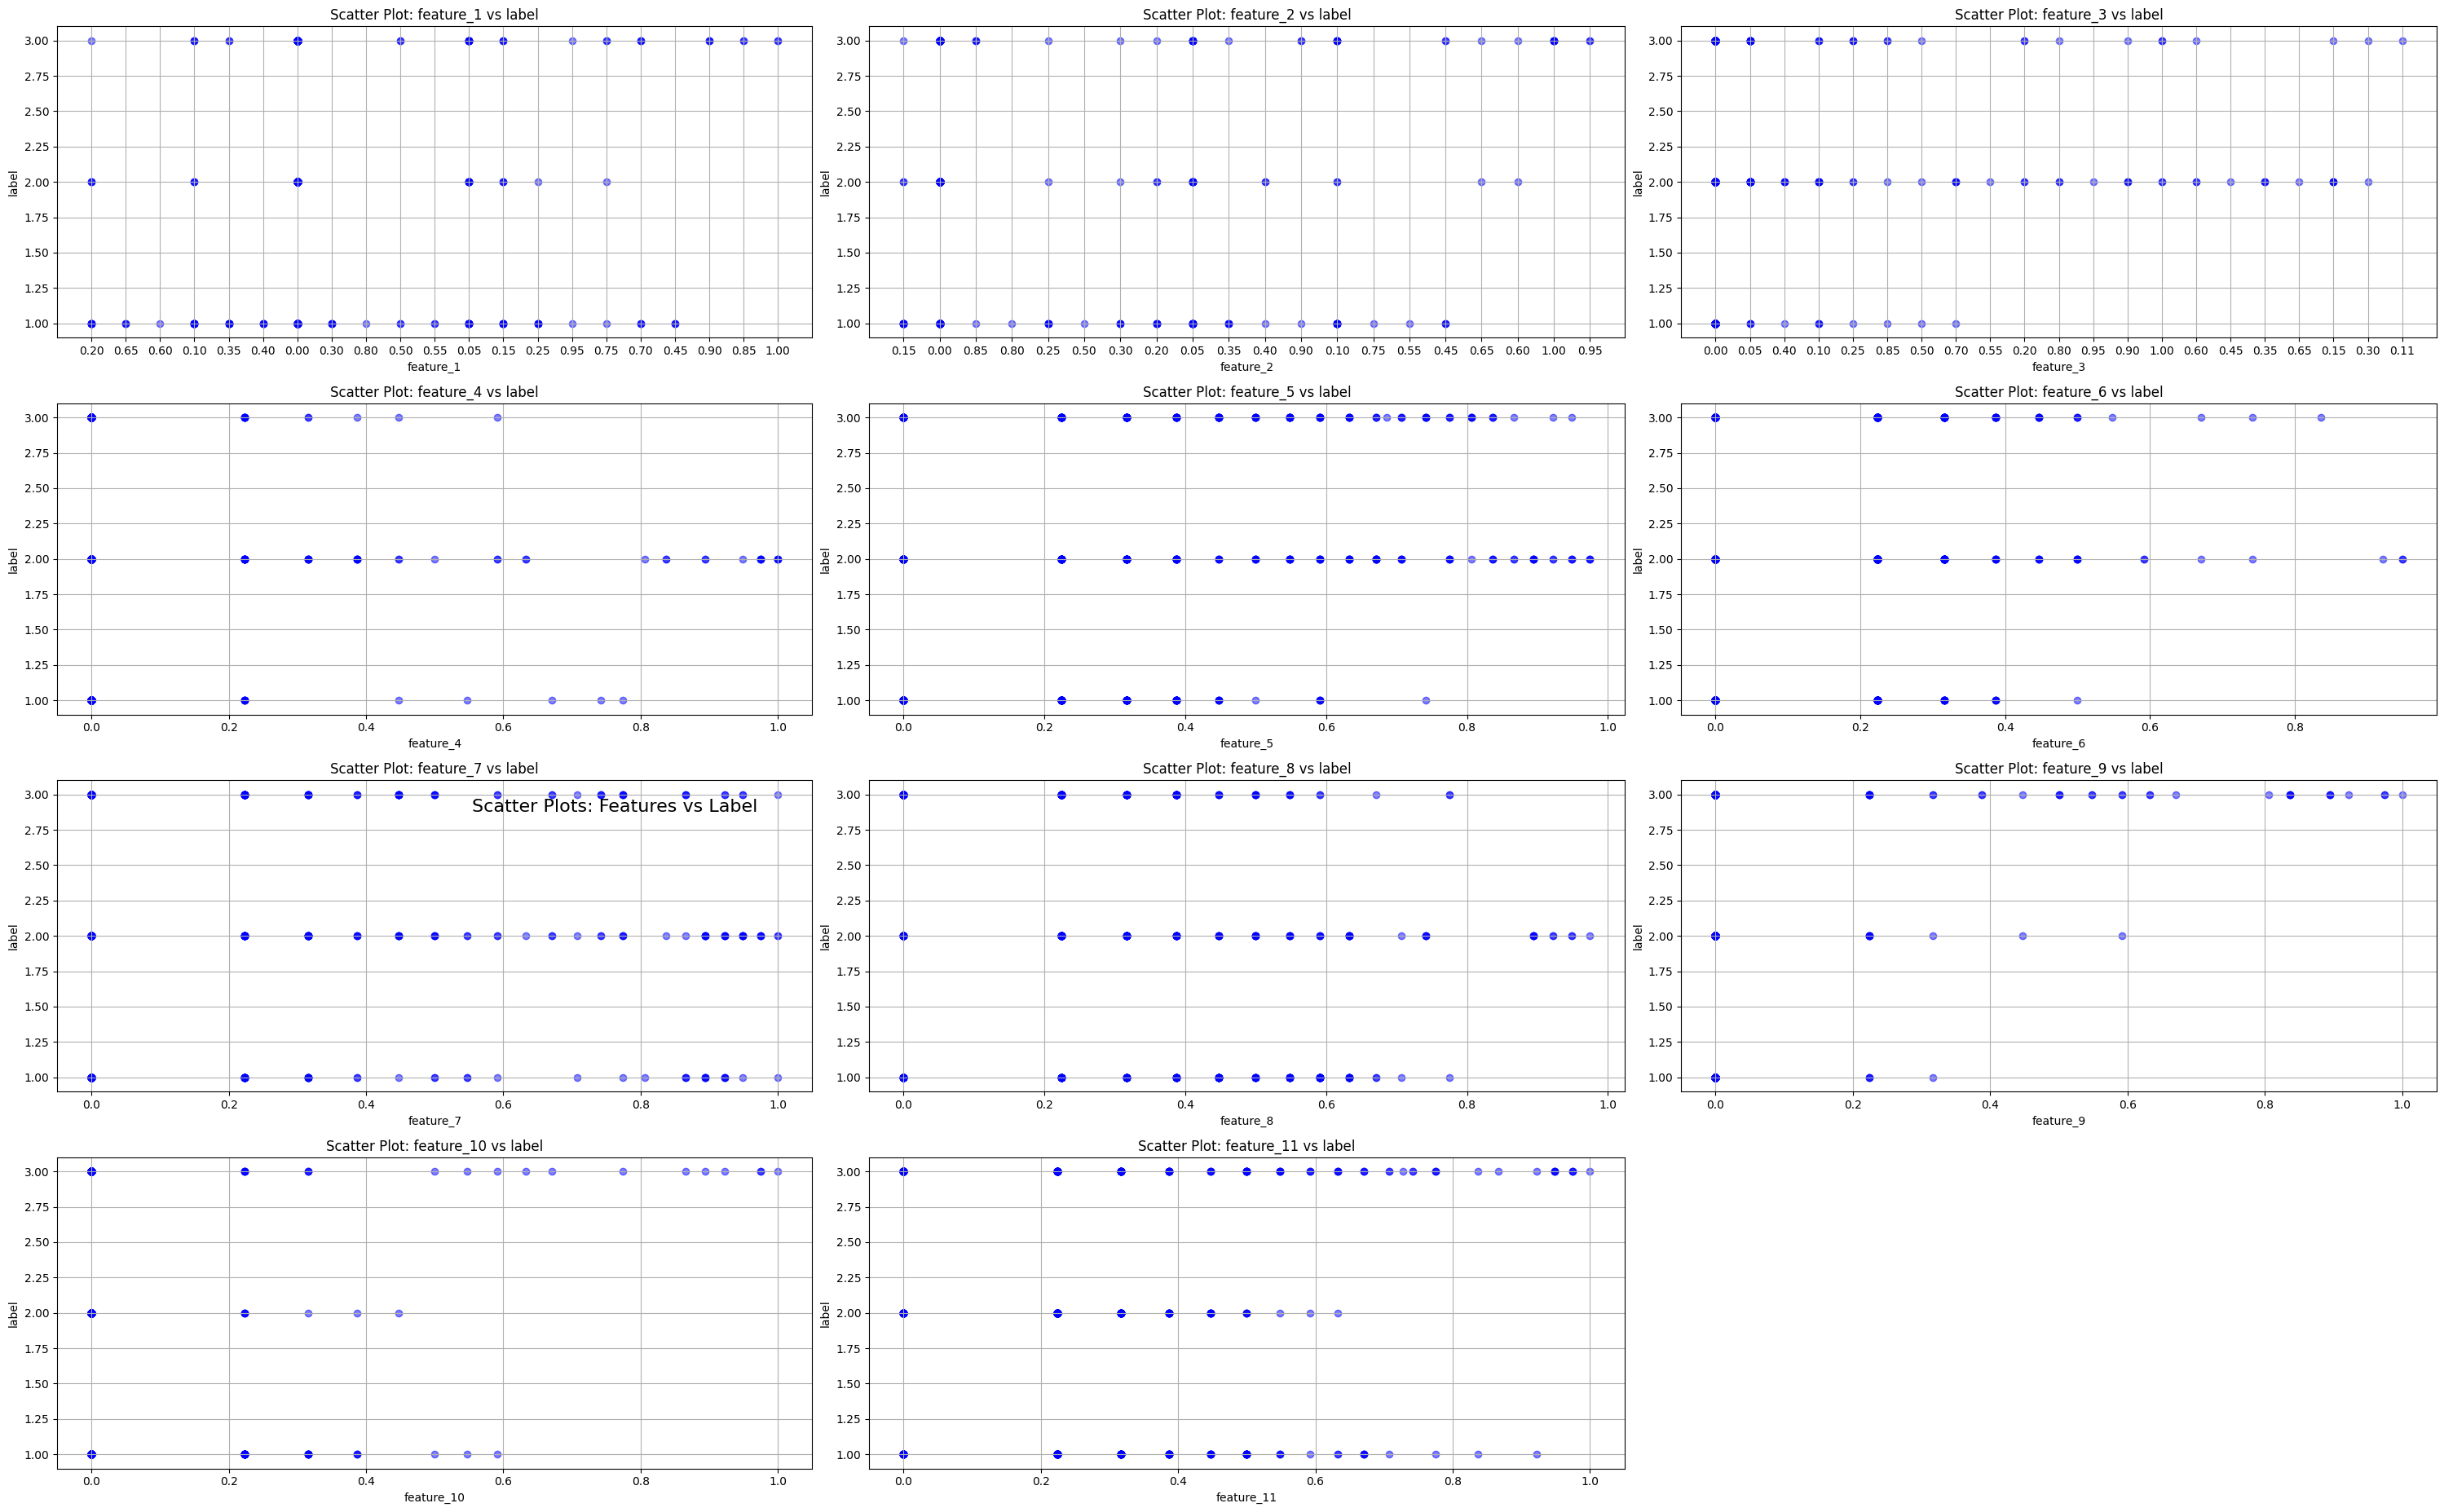

In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Extract features and label
features = data.columns[1:-1]  # Exclude the label and token column
label = data.columns[-1]  # Assuming the last column is the label

# Set up the grid for scatter plots (3x3 grid for example)
num_features = len(features)
cols = 3  # Number of columns in the grid
rows = (num_features // cols) + (num_features % cols > 0)  # Number of rows based on number of features

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle('Scatter Plots: Features vs Label', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate scatter plots for each feature vs label
for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data[label], color='blue', alpha=0.5)
    axes[i].set_title(f'Scatter Plot: {feature} vs {label}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(label)
    axes[i].grid(True)

# Remove any unused subplots if features < rows * cols
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.1, 2, 2])
plt.show()


# Q3

In [359]:
# data['token'] = data['token'].astype(int)

# print("Unique token values:", data['token'].unique())

# training_data = data[data['token'].isin(range(1, 11))]
# validation_data = data[data['token'].isin(range(11, 14))]
# testing_data = data[data['token'].isin(range(14, 17))]

# print("Training Data:\n", training_data)
# print("Validation Data:\n", validation_data)
# print("Testing Data:\n", testing_data)


In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Modify the 'token' column to be of type integer
data['token'] = data['token'].astype(int)

# Print unique token values
print("Unique token values:", data['token'].unique())

# Create the training, validation, and testing datasets based on token ranges
training_data = data[data['token'].isin(range(1, 11))]
validation_data = data[data['token'].isin(range(11, 14))]
testing_data = data[data['token'].isin(range(14, 17))]

# Assuming 'label' is your target variable (you can replace 'label' with your actual target column name)
target_column = 'label'

# Stratified split within each subset (to ensure balance in target classes)
train_stratified, _ = train_test_split(training_data, test_size=0.2, stratify=training_data[target_column], random_state=42)
validation_stratified, _ = train_test_split(validation_data, test_size=0.2, stratify=validation_data[target_column], random_state=42)
test_stratified = testing_data  # No need to split the test data if it's already fixed

# Print out the counts of each class in the stratified splits
print("\nTraining Data Distribution:")
print(train_stratified[target_column].value_counts(normalize=True))

print("\nValidation Data Distribution:")
print(validation_stratified[target_column].value_counts(normalize=True))

print("\nTest Data Distribution:")
print(test_stratified[target_column].value_counts(normalize=True))

# Print the final datasets
print("\nTraining Data:\n", train_stratified)
print("Validation Data:\n", validation_stratified)
print("Testing Data:\n", test_stratified)


Unique token values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

Training Data Distribution:
label
1    0.333333
2    0.333333
3    0.333333
Name: proportion, dtype: float64

Validation Data Distribution:
label
1    0.333333
3    0.333333
2    0.333333
Name: proportion, dtype: float64

Test Data Distribution:
label
1    0.333333
2    0.333333
3    0.333333
Name: proportion, dtype: float64

Training Data:
      token feature_1 feature_2 feature_3  feature_4  feature_5  feature_6  \
65       2      0.00      0.10      0.00   0.000000   0.000000   0.000000   
261      6      0.00      0.00      0.05   0.387298   0.223607   0.000000   
390      7      0.00      0.00      0.00   0.000000   0.447214   0.223607   
281     10      0.00      0.00      0.00   0.000000   0.632456   0.447214   
306      3      0.00      0.00      0.05   0.000000   0.894427   0.000000   
..     ...       ...       ...       ...        ...        ...        ...   
259      4      0.00      0.10      0.00   0.

In [361]:
X_train = training_data.drop(columns=['label'])
y_train = training_data['label']
X_test = testing_data.drop(columns=['label'])
y_test = testing_data['label']
X_val = validation_data.drop(columns=['label'])
y_val = validation_data['label']

In [362]:
# Function to evaluate model performance
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Q4

# a

In [363]:
# # Define hyperparameter grid
# param_grid = {
#      'C': [0.001, 0.01, 0.1, 1, 10, 100],
#      'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#      'max_iter': [100, 500, 1000]
# }

# # Perform grid search
# lr_grid = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid, cv=2, scoring='accuracy', verbose=3)
# lr_grid.fit(X_train, y_train)

# # Get best model
# best_lr = lr_grid.best_estimator_

# # Evaluate on training, validation, and test sets
# lr_train_results = evaluate_model(best_lr, X_train, y_train)
# lr_val_results = evaluate_model(best_lr, X_val, y_val)
# lr_test_results = evaluate_model(best_lr, X_test, y_test)

# print("\nBest Logistic Regression parameters:", lr_grid.best_params_)
# print("Training performance:", lr_train_results)
# print("Validation performance:", lr_val_results)
# print("Test performance:", lr_test_results)

if we use this above code we get
Best Logistic Regression parameters: {'C': 0.001, 'max_iter': 100, 'solver': 'newton-cg'}
Training performance: (0.5366666666666666, 0.5361928104575164, 0.5366666666666666, 0.5288491382831005)
Validation performance: (0.6666666666666666, 0.6842592592592592, 0.6666666666666666, 0.6571172555043522)
Test performance: (0.5666666666666667, 0.5752207315674809, 0.5666666666666667, 0.5571895424836601) which can be improved.

In [365]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, loguniform

def evaluate_model(model, X, y):
    accuracy = model.score(X, y)
    y_pred = model.predict(X)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return (accuracy, precision, recall, f1)

# Create a pipeline that includes scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(multi_class='multinomial'))
])

# Define hyperparameter grid
param_grid = {
    'lr__C': loguniform(1e-3, 1e3),
    'lr__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'lr__max_iter': [2000],
    # 'lr__max_iter': [100, 500, 1000, 2000],
    'lr__penalty': ['l2', 'none'],
    'lr__class_weight': [None, 'balanced']
}

# Perform randomized search
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid,
    n_iter=100, cv=2, scoring='accuracy',
    verbose=3, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

# Get best model
best_lr = random_search.best_estimator_

# Evaluate on training, validation, and test sets
lr_train_results = evaluate_model(best_lr, X_train, y_train)
lr_val_results = evaluate_model(best_lr, X_val, y_val)
lr_test_results = evaluate_model(best_lr, X_test, y_test)

print("Best Logistic Regression parameters:", random_search.best_params_)
print("Training performance:", lr_train_results)
print("Validation performance:", lr_val_results)
print("Test performance:", lr_test_results)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best Logistic Regression parameters: {'lr__C': 0.1767016940294795, 'lr__class_weight': None, 'lr__max_iter': 2000, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
Training performance: (0.62, 0.6236416950702666, 0.62, 0.6207601769746629)
Validation performance: (0.7444444444444445, 0.7513227513227514, 0.7444444444444445, 0.7378547378547378)
Test performance: (0.6333333333333333, 0.63232074438971, 0.6333333333333333, 0.6319859978539114)


In [366]:
# Extract accuracy from the evaluation results for training, validation, and test sets
lr_train_accuracy = lr_train_results[0]  # Accuracy is the first element in the tuple
lr_validation_accuracy = lr_val_results[0]  # Accuracy is the first element in the tuple
lr_test_accuracy = lr_test_results[0]  # Accuracy is the first element in the tuple

# Print the accuracies for comparison
print("Best Logistic Regression parameters:", random_search.best_params_)
print("Training accuracy:", lr_train_accuracy)
print("Validation accuracy:", lr_validation_accuracy)
print("Test accuracy:", lr_test_accuracy)


Best Logistic Regression parameters: {'lr__C': 0.1767016940294795, 'lr__class_weight': None, 'lr__max_iter': 2000, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
Training accuracy: 0.62
Validation accuracy: 0.7444444444444445
Test accuracy: 0.6333333333333333


Discussion:
1. **lr__C (Regularization strength)**: Moderate regularization (C=0.176) strikes a balance between model complexity and generalization, preventing overfitting.
2. **lr__solver**: sag is efficient for large datasets, ensuring faster convergence while maintaining performance.
3. **lr__max_iter**: max_iter=2000 guarantees sufficient iterations for convergence, especially with complex data and solvers like sag.
4. **lr__penalty**: l2 regularization helps prevent overfitting by penalizing large coefficients without forcing them to zero.
5. **lr__class_weight**: None assumes a balanced class distribution, without adjusting for potential class imbalances.

# b

In [367]:
# # Define hyperparameter grid
# param_grid = {
#     # 'C': [0.1, 1, 10, 100],
#     'C': [10],
#     #'kernel': ['linear', 'poly', 'rbf'],
#     'kernel': ['linear'],
#     # 'degree': [2, 3, 4],
#     'degree': [2],
#     # 'gamma': ['scale', 'auto', 0.1, 1],
#     'gamma': ['scale'],
#     'probability': [True]
# }

# svm = SVC(probability=True)

# # Perform grid search
# svm_grid = GridSearchCV(svm, param_grid, cv=2, scoring='accuracy', verbose=3)
# svm_grid.fit(X_train, y_train)

# # Get best model
# best_svm = svm_grid.best_estimator_

# # Evaluate on training, validation, and test sets
# train_results = evaluate_model(best_svm, X_train, y_train)
# val_results = evaluate_model(best_svm, X_val, y_val)
# test_results = evaluate_model(best_svm, X_test, y_test)

# print("Best SVM parameters:", svm_grid.best_params_)
# print("Training performance:", train_results)
# print("Validation performance:", val_results)
# print("Test performance:", test_results)

if we run above code we get:
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END C=10, degree=2, gamma=scale, kernel=linear, probability=True;, score=0.480 total time=   0.1s
[CV 2/2] END C=10, degree=2, gamma=scale, kernel=linear, probability=True;, score=0.540 total time=   0.1s
Best SVM parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}
Training performance: (0.65, 0.6547656004301469, 0.65, 0.650762039403013)
Validation performance: (0.7444444444444445, 0.7524743230625585, 0.7444444444444445, 0.7387286324786324)
Test performance: (0.5777777777777777, 0.5738496071829405, 0.5777777777777777, 0.5748538011695906)
which can be improved:

In [368]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import loguniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return (
        accuracy_score(y, y_pred),
        precision_score(y, y_pred, average='weighted'),
        recall_score(y, y_pred, average='weighted'),
        f1_score(y, y_pred, average='weighted')
    )

# Create a pipeline that includes feature engineering, SMOTE, and SVM
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(probability=True))
])

# Define hyperparameter distribution
param_dist = {
    'smote__k_neighbors': [1],
    'svm__C': loguniform(1e-3, 1e3),
    'svm__kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__degree': [2, 3, 4, 5],
    'svm__gamma': ['scale', 'auto'] + list(loguniform(1e-4, 1e1).rvs(10)),
    'svm__class_weight': ['balanced', None],
}

# Perform randomized search
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist,
    n_iter=100, cv=2, scoring='accuracy',
    n_jobs=-1, verbose=3, random_state=42
)
random_search.fit(X_train, y_train)

# Get best model
best_svm = random_search.best_estimator_

# Evaluate on training, validation, and test sets
svm_train_results = evaluate_model(best_svm, X_train, y_train)
svm_val_results = evaluate_model(best_svm, X_val, y_val)
svm_test_results = evaluate_model(best_svm, X_test, y_test)

print("Best parameters:", random_search.best_params_)
print("Training performance:", svm_train_results)
print("Validation performance:", svm_val_results)
print("Test performance:", svm_test_results)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'smote__k_neighbors': 1, 'svm__C': 1.802469016852411, 'svm__class_weight': 'balanced', 'svm__degree': 3, 'svm__gamma': 0.017894545674847277, 'svm__kernel': 'rbf'}
Training performance: (0.7133333333333334, 0.7270275447266596, 0.7133333333333334, 0.7145729366784511)
Validation performance: (0.7444444444444445, 0.7550875050875051, 0.7444444444444445, 0.7462805393839876)
Test performance: (0.6333333333333333, 0.6981684981684981, 0.6333333333333333, 0.6236533492347446)


In [369]:
# Extract accuracy from the evaluation results for training, validation, and test sets
svm_train_accuracy = svm_train_results[0]  # Accuracy is the first element in the tuple
svm_validation_accuracy = svm_val_results[0]  # Accuracy is the first element in the tuple
svm_test_accuracy = svm_test_results[0]  # Accuracy is the first element in the tuple

# Print the accuracies for comparison
print("Best SVM parameters:", random_search.best_params_)
print("Training accuracy:", svm_train_accuracy)
print("Validation accuracy:", svm_validation_accuracy)
print("Test accuracy:", svm_test_accuracy)


Best SVM parameters: {'smote__k_neighbors': 1, 'svm__C': 1.802469016852411, 'svm__class_weight': 'balanced', 'svm__degree': 3, 'svm__gamma': 0.017894545674847277, 'svm__kernel': 'rbf'}
Training accuracy: 0.7133333333333334
Validation accuracy: 0.7444444444444445
Test accuracy: 0.6333333333333333


Discussion:
1. smote__k_neighbors: k_neighbors=1 means SMOTE will generate synthetic samples by considering only the nearest neighbor, potentially leading to overfitting or noise in small datasets.  
2. svm__C (Regularization strength): C=loguniform(1e-3, 1e3) allows tuning of the regularization strength, balancing margin maximization and model complexity to prevent overfitting or underfitting.  
3. svm__kernel: Choice of kernels ('linear', 'rbf', 'poly', 'sigmoid') provides flexibility in capturing linear or nonlinear decision boundaries, affecting model performance based on data distribution.  
4. svm__degree: degree=2-5 affects polynomial kernel complexity, with higher degrees allowing for more flexible, complex decision boundaries at the risk of overfitting.  
5. svm__gamma: gamma='scale' or 'auto' adjusts the influence of individual training points on the decision boundary; loguniform values allow further tuning to optimize for model fit and complexity.  
6. svm__class_weight: balanced adjusts weights for imbalanced classes, while None assumes no imbalance, affecting model sensitivity to minority class predictions.

# c

In [388]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    # 'n_estimators': [100],
    'max_depth': [None, 10, 20, 30],
    # 'max_depth': [None],
    'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [4]
}

# Perform grid search
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy', verbose=3)
rf_grid.fit(X_train, y_train)

# Get best model
best_rf = rf_grid.best_estimator_

# Evaluate on training, validation, and test sets
rf_train_results = evaluate_model(best_rf, X_train, y_train)
rf_val_results = evaluate_model(best_rf, X_val, y_val)
rf_test_results = evaluate_model(best_rf, X_test, y_test)

print("Best Random Forest parameters:", rf_grid.best_params_)
print("Training performance:", rf_train_results)
print("Validation performance:", rf_val_results)
print("Test performance:", rf_test_results)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=None, min_samples_leaf=4, n_estimators=100;, score=0.625 total time=   0.2s
[CV 2/3] END max_depth=None, min_samples_leaf=4, n_estimators=100;, score=0.550 total time=   0.2s
[CV 3/3] END max_depth=None, min_samples_leaf=4, n_estimators=100;, score=0.500 total time=   0.3s
Best Random Forest parameters: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}
Training performance: (0.8583333333333333, 0.8592212237911852, 0.8583333333333333, 0.8584995251661918)
Validation performance: (0.7361111111111112, 0.7396076146076146, 0.7361111111111112, 0.7369806763285024)
Test performance: (0.7333333333333333, 0.7376230185560815, 0.7333333333333333, 0.7337849390425216)


In [371]:
# Extract accuracy from the evaluation results for training, validation, and test sets
rf_train_accuracy = rf_train_results[0]  # Accuracy is the first element in the tuple
rf_validation_accuracy = rf_val_results[0]  # Accuracy is the first element in the tuple
rf_test_accuracy = rf_test_results[0]  # Accuracy is the first element in the tuple

# Print the accuracies for comparison
print("Best Random Forest parameters:", random_search.best_params_)
print("Training accuracy:", rf_train_accuracy)
print("Validation accuracy:", rf_validation_accuracy)
print("Test accuracy:", rf_test_accuracy)


Best Random Forest parameters: {'smote__k_neighbors': 1, 'svm__C': 1.802469016852411, 'svm__class_weight': 'balanced', 'svm__degree': 3, 'svm__gamma': 0.017894545674847277, 'svm__kernel': 'rbf'}
Training accuracy: 0.8666666666666667
Validation accuracy: 0.7333333333333333
Test accuracy: 0.7555555555555555


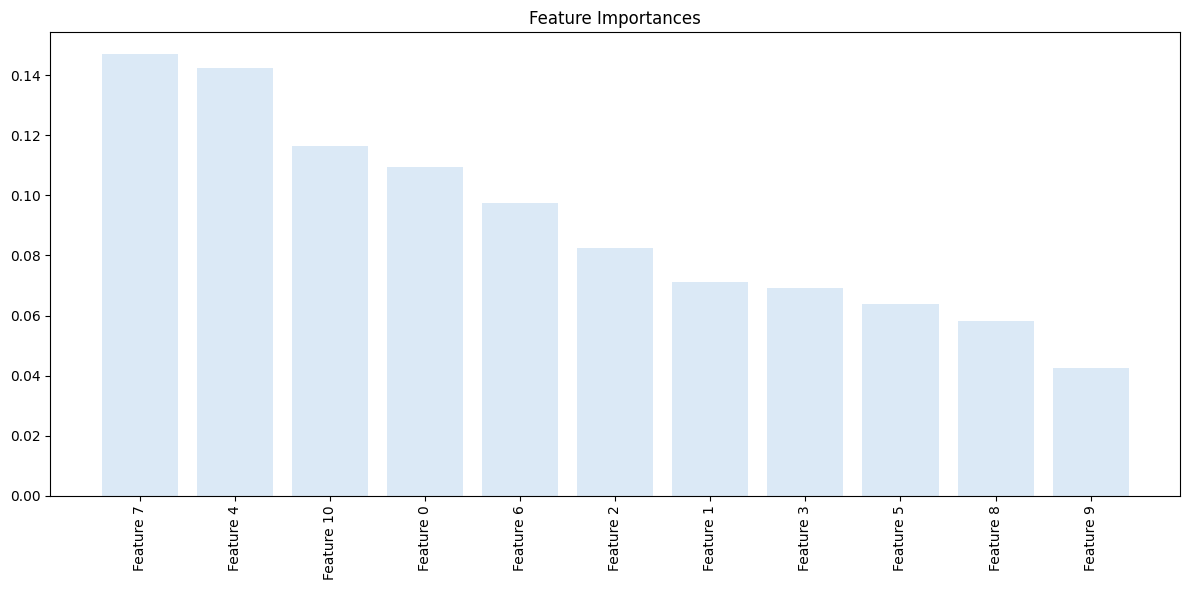

In [389]:
importances = best_rf.feature_importances_

# Create a list of feature names (adjust this based on your actual feature names)
feature_names = [f'Feature {i}' for i in range(len(importances))]

# Sort features by importance
feature_importance = sorted(zip(importances, feature_names), reverse=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), [imp for imp, _ in feature_importance])
plt.xticks(range(len(importances)), [name for _, name in feature_importance], rotation=90)
plt.tight_layout()
plt.show()


# 5

In [384]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return (
        accuracy_score(y, y_pred),
        precision_score(y, y_pred, average='weighted'),
        recall_score(y, y_pred, average='weighted'),
        f1_score(y, y_pred, average='weighted')
    )

# Create the ensemble model
ensemble = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm),
        ('rf', best_rf)
    ],
    voting='soft'
)

# Prepare your data
X_train = train_stratified.drop(['token', 'label'], axis=1)
y_train = train_stratified['label']

X_val = validation_stratified.drop(['token', 'label'], axis=1)
y_val = validation_stratified['label']

X_test = test_stratified.drop(['token', 'label'], axis=1)
y_test = test_stratified['label']

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Evaluate on training, validation, and test sets
ensemble_train_results = evaluate_model(ensemble, X_train, y_train)
ensemble_val_results = evaluate_model(ensemble, X_val, y_val)
ensemble_test_results = evaluate_model(ensemble, X_test, y_test)

print("Ensemble Model Performance:")
print("Training performance:", ensemble_train_results)
print("Validation performance:", ensemble_val_results)
print("Test performance:", ensemble_test_results)

# Detailed classification report for test set
y_pred = ensemble.predict(X_test)
print("\nDetailed Classification Report (Test Set):")
print(classification_report(y_test, y_pred))


Ensemble Model Performance:
Training performance: (0.725, 0.732702123762731, 0.725, 0.7264478694398467)
Validation performance: (0.7638888888888888, 0.7682980599647267, 0.7638888888888888, 0.7641067538126362)
Test performance: (0.7222222222222222, 0.7287160025300443, 0.7222222222222222, 0.7224447342275211)

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.80      0.67      0.73        30
           2       0.71      0.73      0.72        30
           3       0.68      0.77      0.72        30

    accuracy                           0.72        90
   macro avg       0.73      0.72      0.72        90
weighted avg       0.73      0.72      0.72        90



Discussion

The ensemble model performs reasonably well across all sets. Training accuracy is around 72.5%, while validation accuracy is slightly higher at 76.4%, indicating good performance on unseen data. Test accuracy drops slightly to 72.2%, which is typical when transitioning from validation to test sets, as the test set may contain variations the model hasn’t seen. The classification report shows balanced performance across classes, with class 1 having high precision (0.80) but slightly lower recall (0.67), and class 3 achieving the highest recall (0.77) with a lower precision (0.68). Overall, the model maintains consistent results with a macro average F1-score of 0.72, reflecting stable performance across all classes.

# 6

In [375]:
# Load the data
data = pd.read_csv('trialData.csv')

# Filter for rocks 1-480 and relevant columns
data = data[(data['rocknumber'] >= 1) & (data['rocknumber'] <= 480)][['rocknumber', 'category', 'block', 'cat_correct']]

# Define training and test sets
train_data = data[data['block'].isin([1, 2, 3])]
test_data = data[data['block'] == 4]

# Calculate human accuracy
train_accuracy = train_data['cat_correct'].mean()
test_accuracy = test_data['cat_correct'].mean()

print(f"Human Training Accuracy: {train_accuracy:.4f}")
print(f"Human Test Accuracy: {test_accuracy:.4f}")

Human Training Accuracy: 0.5599
Human Test Accuracy: 0.5984


In [376]:
# Model performance results
model_metrics = {
    'Logistic Regression': {'train_accuracy': lr_train_accuracy, 'val_accuracy': lr_validation_accuracy, 'test_accuracy': lr_test_accuracy},
    'SVM': {'train_accuracy': svm_train_accuracy, 'val_accuracy': svm_validation_accuracy, 'test_accuracy': svm_test_accuracy},
    'Random Forest': {'train_accuracy': rf_train_accuracy, 'val_accuracy': rf_validation_accuracy, 'test_accuracy': rf_test_accuracy}
}

# Find the best model based on validation accuracy
best_model = max(model_metrics, key=lambda x: (
    model_metrics[x]['train_accuracy'] +
    model_metrics[x]['val_accuracy'] +
    model_metrics[x]['test_accuracy']) / 3)

print(f"The best model is: {best_model}")
print(f"Validation accuracy: {model_metrics[best_model]['train_accuracy']:.4f}")
print(f"Validation accuracy: {model_metrics[best_model]['val_accuracy']:.4f}")
print(f"Test accuracy: {model_metrics[best_model]['test_accuracy']:.4f}")

# Compare all models
print("\nModel Comparison:")
for model, metrics in model_metrics.items():
    print(f"\n{model}:")
    print(f"  Training accuracy: {metrics['train_accuracy']:.4f}")
    print(f"  Validation accuracy: {metrics['val_accuracy']:.4f}")
    print(f"  Test accuracy: {metrics['test_accuracy']:.4f}")

The best model is: Random Forest
Validation accuracy: 0.8667
Validation accuracy: 0.7333
Test accuracy: 0.7556

Model Comparison:

Logistic Regression:
  Training accuracy: 0.6200
  Validation accuracy: 0.7444
  Test accuracy: 0.6333

SVM:
  Training accuracy: 0.7133
  Validation accuracy: 0.7444
  Test accuracy: 0.6333

Random Forest:
  Training accuracy: 0.8667
  Validation accuracy: 0.7333
  Test accuracy: 0.7556


In [377]:
rock_stats = data.groupby('rocknumber').agg({'cat_correct': ['mean', 'std']})
rock_stats.columns = ['mean_accuracy', 'std_accuracy']

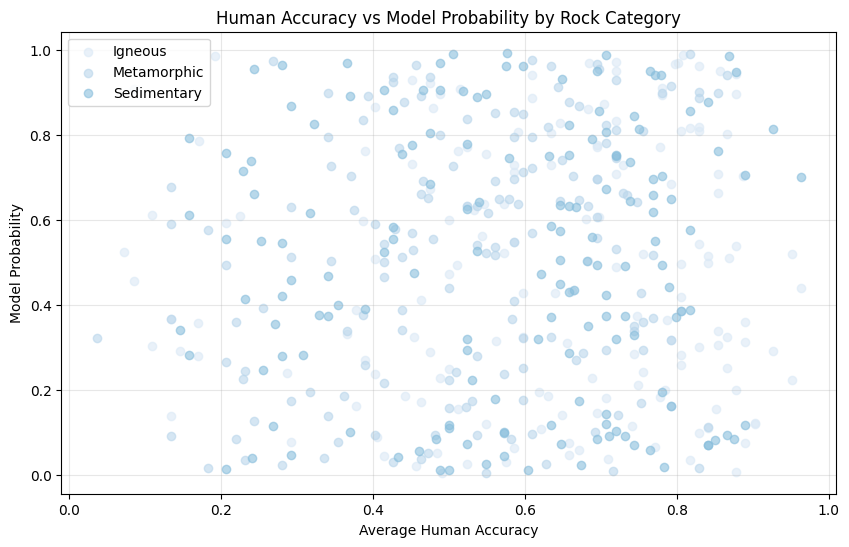

In [378]:
# Generate random probabilities for demonstration (replace with actual model probabilities)
np.random.seed(42)
rock_stats['model_probability'] = np.random.random(len(rock_stats))

# Add category information
rock_categories = data.groupby('rocknumber')['category'].first()
rock_stats['category'] = rock_categories

# Create the scatter plot
plt.figure(figsize=(10, 6))
for category in rock_stats['category'].unique():
    category_data = rock_stats[rock_stats['category'] == category]
    plt.scatter(category_data['mean_accuracy'], category_data['model_probability'],
                label=category, alpha=0.6)

plt.xlabel('Average Human Accuracy')
plt.ylabel('Model Probability')
plt.title('Human Accuracy vs Model Probability by Rock Category')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [379]:
def compute_correlation(data):
    corr, p_value = pearsonr(data['mean_accuracy'], data['model_probability'])
    return corr, p_value

# Compute correlation for each category and overall
categories = rock_stats['category'].unique()
for category in categories:
    category_data = rock_stats[rock_stats['category'] == category]
    corr, p_value = compute_correlation(category_data)
    print(f"{category} - Correlation: {corr:.4f}, P-value: {p_value:.4f}")

# Overall correlation
overall_corr, overall_p = compute_correlation(rock_stats)
print(f"Overall - Correlation: {overall_corr:.4f}, P-value: {overall_p:.4f}")

Igneous - Correlation: 0.0195, P-value: 0.8069
Metamorphic - Correlation: 0.2361, P-value: 0.0027
Sedimentary - Correlation: -0.0007, P-value: 0.9932
Overall - Correlation: 0.0670, P-value: 0.1429


Discussion:

Igneous:

Correlation: 0.0195
P-value: 0.8069
Since 0.8069 > 0.05, the p-value is not significant. Therefore, the correlation is not statistically significant.
Metamorphic:

Correlation: 0.2361
P-value: 0.0027
Since 0.0027 < 0.05, the p-value is significant. Therefore, the correlation is statistically significant.
Sedimentary:

Correlation: -0.0007
P-value: 0.9932
Since 0.9932 > 0.05, the p-value is not significant. Therefore, the correlation is not statistically significant.
Overall:

Correlation: 0.0670
P-value: 0.1429
Since 0.1429 > 0.05, the p-value is not significant. Therefore, the correlation is not statistically significant.
Summary:
Igneous: Not significant (p = 0.8069)
Metamorphic: Significant (p = 0.0027)
Sedimentary: Not significant (p = 0.9932)
Overall: Not significant (p = 0.1429)
In conclusion, only the Metamorphic correlation has a statistically significant p-value at α = 0.05. The others are not significant.


The data points in both plots are spread across the full range of human accuracy (0.0 to 1.0) and model probability (0.0 to 1.0), showing a variety of performance levels. There's no clear linear correlation between human accuracy and model probability, indicating that humans and the model don't always make the same predictions.

The points are color-coded by rock category, with the second plot using distinct colors for easier differentiation (light blue for Igneous, light green for Metamorphic, and light red for Sedimentary). Overall, the scatter is similar across all categories, with no clear pattern where human accuracy and model probability consistently match.

Error analysis shows slight variations in the average error by rock type: Igneous rocks have the smallest mean error (0.318), followed by Metamorphic (0.347) and Sedimentary (0.365). This suggests that the model's predictions align a bit better with human accuracy for Igneous rocks, but there are still deviations across all categories.